In [1]:
!pip install opendatasets --quiet
import opendatasets as od
od.download("https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: davidzhangmilk
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package


In [17]:
import torch
import torch.nn as nn
from torchsummary import summary
from torch.optim import Adam
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

device = "cuda" if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [3]:
data_df = pd.read_csv("weather-dataset-rattle-package/weatherAUS.csv")
data_df.dropna(inplace = True)
data_df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
142298,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,...,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,No
142299,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,...,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,No
142300,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,...,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,No
142301,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,...,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,No
142302,2017-06-24,Darwin,20.2,31.7,0.0,5.6,10.7,ENE,30.0,ENE,...,73.0,32.0,1013.9,1009.7,6.0,5.0,25.4,31.0,No,No


In [4]:
label_encoder = LabelEncoder()
data_df["RainTomorrow"] = label_encoder.fit_transform(data_df["RainTomorrow"])
data_df["RainToday"] = label_encoder.fit_transform(data_df["RainToday"])

data_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0


In [5]:
data_df.drop(columns =  "Date", inplace = True)
data_df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [6]:
data_df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0
6050,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0
6052,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0
6053,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0
6054,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0


In [7]:
one_hot_encoder = OneHotEncoder(sparse_output=False)

categorical_cols = ["WindGustDir", "WindDir9am", "WindDir3pm", "Location"]
encoded_data = one_hot_encoder.fit_transform(data_df[categorical_cols])
one_hot_cols = one_hot_encoder.get_feature_names_out(categorical_cols)

print(encoded_data.shape, one_hot_cols.shape)

one_hot_data = pd.DataFrame(encoded_data, columns = one_hot_cols)

data_df = pd.concat([one_hot_data, data_df.drop(columns = categorical_cols)], axis = 1).fillna(0)
label_df = data_df[["RainTomorrow"]]
data_df.drop(columns = "RainTomorrow", inplace = True)



(56420, 74) (74,)


In [8]:
data_df.head()

,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
data_df.columns

Index(['WindGustDir_E', 'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N',
       'WindGustDir_NE', 'WindGustDir_NNE', 'WindGustDir_NNW',
       'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE', 'WindGustDir_SSE',
       'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW',
       'WindGustDir_WSW', 'WindDir9am_E', 'WindDir9am_ENE', 'WindDir9am_ESE',
       'WindDir9am_N', 'WindDir9am_NE', 'WindDir9am_NNE', 'WindDir9am_NNW',
       'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SE', 'WindDir9am_SSE',
       'WindDir9am_SSW', 'WindDir9am_SW', 'WindDir9am_W', 'WindDir9am_WNW',
       'WindDir9am_WSW', 'WindDir3pm_E', 'WindDir3pm_ENE', 'WindDir3pm_ESE',
       'WindDir3pm_N', 'WindDir3pm_NE', 'WindDir3pm_NNE', 'WindDir3pm_NNW',
       'WindDir3pm_NW', 'WindDir3pm_S', 'WindDir3pm_SE', 'WindDir3pm_SSE',
       'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W', 'WindDir3pm_WNW',
       'WindDir3pm_WSW', 'Location_AliceSprings', 'Location_Brisbane',
       'Location_Ca

In [10]:
class CustomDataset(Dataset):
  def __init__(self, X, y):
    self.X = torch.tensor(X, dtype = torch.float32).to(device)
    self.y = torch.tensor(y, dtype = torch.float32).to(device)

  def __len__(self):
    return len(self.y)

  def __getitem__(self, index):
    return self.X[index], self.y[index]


In [11]:
X, y = np.array(data_df), np.array(label_df)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5)

train_dataset = CustomDataset(X_train, y_train)
val_dataset = CustomDataset(X_val, y_val)
test_dataset = CustomDataset(X_test, y_test)


In [12]:
train_DataLoader = DataLoader(train_dataset, batch_size = 32)
val_DataLoader = DataLoader(val_dataset, batch_size = 32)
test_DataLoader = DataLoader(test_dataset, batch_size = 32)

In [13]:
HIDDEN_NEURONS = 100

class MyModel(nn.Module):
  def __init__(self):
    super(MyModel, self).__init__()

    self.input = nn.Linear(X.shape[1], HIDDEN_NEURONS)

    self.linear1 = nn.Linear(HIDDEN_NEURONS, HIDDEN_NEURONS)
    self.linear2 = nn.Linear(HIDDEN_NEURONS, 1)

    self.relu = nn.ReLU()
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    x = self.input(x)

    x = self.linear1(x)
    x = self.relu(x)

    x = self.linear1(x)
    x = self.relu(x)

    x = self.linear1(x)
    x = self.relu(x)

    x = self.linear2(x)
    x = self.sigmoid(x)
    return x

model = MyModel().to(device)

In [14]:
summary(model, (X.shape[1], ))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 100]           9,200
            Linear-2                  [-1, 100]          10,100
              ReLU-3                  [-1, 100]               0
            Linear-4                  [-1, 100]          10,100
              ReLU-5                  [-1, 100]               0
            Linear-6                  [-1, 100]          10,100
              ReLU-7                  [-1, 100]               0
            Linear-8                    [-1, 1]             101
           Sigmoid-9                    [-1, 1]               0
Total params: 39,601
Trainable params: 39,601
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.15
Estimated Total Size (MB): 0.16
---------------------------------------------

In [15]:
criterion = nn.BCELoss()
optimizer = Adam(model.parameters(), lr = 1e-3)

In [19]:
train_loss_plot = []
train_acc_plot = []
val_loss_plot = []
val_acc_plot = []

epochs = 10
for epoch in range(epochs):
  train_loss_total = 0
  train_acc_total = 0
  val_loss_total = 0
  val_acc_total = 0

  for data in train_DataLoader:
    inputs, labels = data

    outputs = model(inputs)

    batch_loss = criterion(outputs, labels)
    train_loss_total += batch_loss.item()

    train_acc_total += (outputs.round() == labels).sum().item()

    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()

  with torch.no_grad():
    for data in val_DataLoader:
      inputs, labels = data

      outputs = model(inputs)

      batch_loss = criterion(outputs, labels)
      val_loss_total += batch_loss.item()

      val_acc_total += (outputs.round() == labels).sum().item()


  train_loss_plot.append(round(train_loss_total/1000, 4))
  val_loss_plot.append(round(val_loss_total/1000, 4))

  train_acc_plot.append(round((train_acc_total/len(train_dataset) * 100), 4))
  val_acc_plot.append(round((val_acc_total/len(val_dataset) * 100), 4))

  print(f"Epoch {epoch} train_loss: {train_loss_plot[-1]} train_acc: {train_acc_plot[-1]} val_loss: {val_loss_plot[-1]} val_acc: {val_acc_plot[-1]}")
  print("="*25)




Epoch 0 train_loss: 0.4301 train_acc: 91.1786 val_loss: 0.0904 val_acc: 91.5999
Epoch 1 train_loss: 0.4296 train_acc: 91.2388 val_loss: 0.0904 val_acc: 91.641
Epoch 2 train_loss: 0.4285 train_acc: 91.1991 val_loss: 0.0906 val_acc: 91.545
Epoch 3 train_loss: 0.429 train_acc: 91.1757 val_loss: 0.0906 val_acc: 91.5108
Epoch 4 train_loss: 0.4286 train_acc: 91.2006 val_loss: 0.0919 val_acc: 91.4423
Epoch 5 train_loss: 0.4281 train_acc: 91.2168 val_loss: 0.0903 val_acc: 91.6204
Epoch 6 train_loss: 0.4278 train_acc: 91.2241 val_loss: 0.0908 val_acc: 91.5862
Epoch 7 train_loss: 0.4281 train_acc: 91.2197 val_loss: 0.0911 val_acc: 91.4971
Epoch 8 train_loss: 0.4278 train_acc: 91.2432 val_loss: 0.0904 val_acc: 91.5999
Epoch 9 train_loss: 0.4273 train_acc: 91.2226 val_loss: 0.0907 val_acc: 91.6273


In [20]:
with torch.no_grad():
    test_loss_total = 0
    test_acc_total = 0

    for data in test_DataLoader:
      inputs, labels = data

      outputs = model(inputs)

      batch_loss = criterion(outputs, labels)
      test_loss_total += batch_loss.item()

      test_acc_total += (outputs.round() == labels).sum().item()
    print(f"Loss:{round(test_loss_total/1000,4)} Accuracy: {round(test_acc_total/len(test_dataset) * 100, 4)}")

Loss:0.0891 Accuracy: 91.593


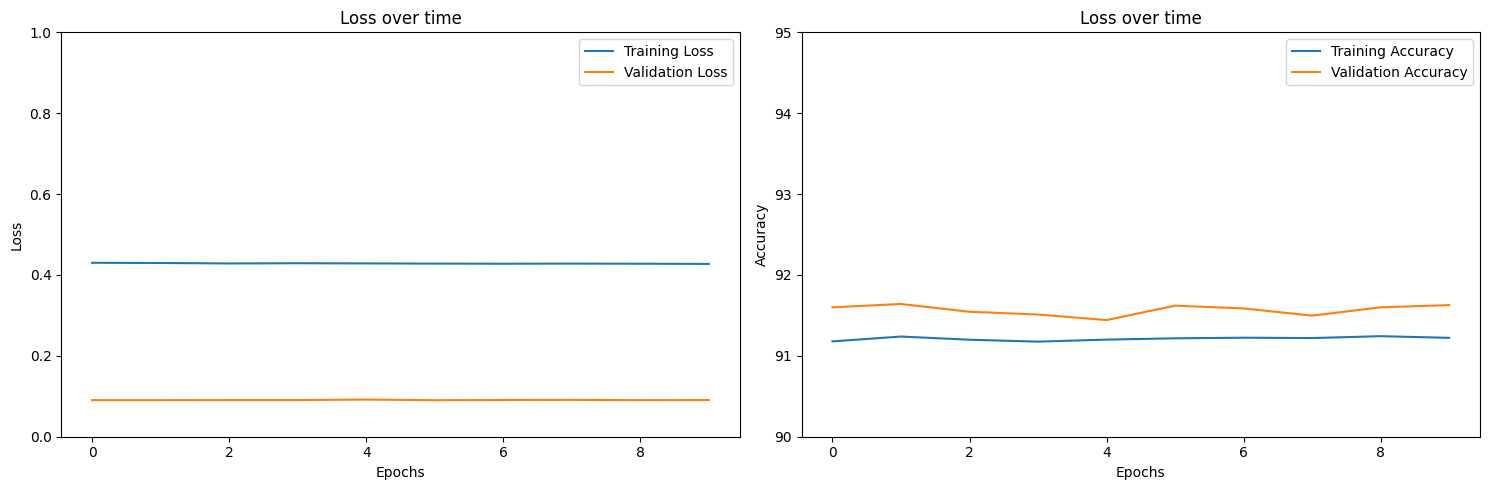

In [30]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (15,5))
axs[0].plot(train_loss_plot, label = "Training Loss")
axs[0].plot(val_loss_plot, label = "Validation Loss")
axs[0].set_title("Loss over time")
axs[0].set_xlabel("Epochs")
axs[0].set_ylabel("Loss")
axs[0].set_ylim([0,1])
axs[0].legend()

axs[1].plot(train_acc_plot, label = "Training Accuracy")
axs[1].plot(val_acc_plot, label = "Validation Accuracy")
axs[1].set_title("Loss over time")
axs[1].set_xlabel("Epochs")
axs[1].set_ylabel("Accuracy")
axs[1].set_ylim([90,95])
axs[1].legend()

plt.tight_layout()

plt.show()